In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import os
import warnings
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 10,6
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:

df = pd.read_csv('Carnival Cruise Stock - Sheet1.csv')

In [4]:
df.head()

,Date,Close
0,1/4/2021 16:00:00,20.38
1,1/5/2021 16:00:00,20.60
2,1/6/2021 16:00:00,20.40
3,1/7/2021 16:00:00,20.74
4,1/8/2021 16:00:00,20.47


In [5]:
df.tail()

,Date,Close
247,12/27/2021 16:00:00,20.95
248,12/28/2021 16:00:00,20.90
249,12/29/2021 16:00:00,20.79
250,12/30/2021 16:00:00,20.53
251,12/31/2021 16:00:00,20.12


In [6]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,252.0,24.050476,3.345144,16.38,21.405,23.64,26.8675,31.31


need to get the date column changed to correct format, Y-M-D, no HMS

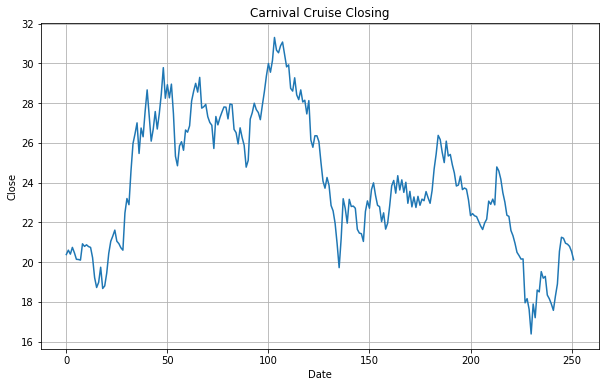

In [8]:
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.title('Carnival Cruise Closing')
plt.show()

<AxesSubplot:ylabel='Density'>

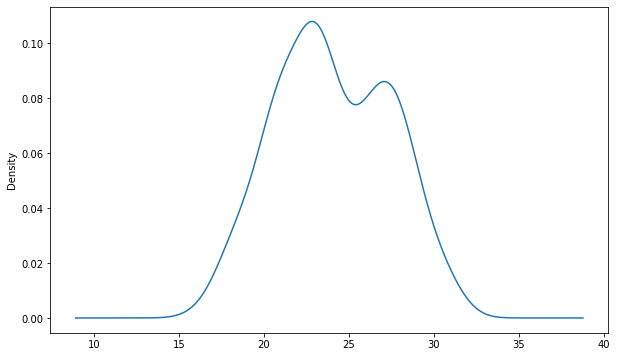

In [9]:
df['Close'].plot(kind='kde')

In [10]:
#Testing stationarity
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    
    #plots
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='green', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Results of ADF Test ')
    adft = adfuller(timeseries, autolag='AIC')
    
    index_lst = ['Test Statistics', 'P-Value', '# of Lags Used', '# of Observations Used']
    out = pd.Series(adft[0:4], index = index_lst)
    for key, value in adft[4].items():
        out['critical value (%s)'%key] = value
        
    print(out)

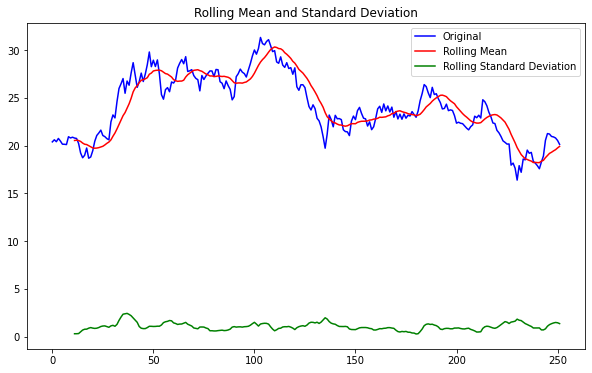

Results of ADF Test 
Test Statistics            -1.770130
P-Value                     0.395389
# of Lags Used              0.000000
# of Observations Used    251.000000
critical value (1%)        -3.456674
critical value (5%)        -2.873125
critical value (10%)       -2.572944
dtype: float64


In [11]:
test_stationarity(df['Close'])